# Gun Detection with VGG16

In [44]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input

In [21]:
import os

In [40]:
import numpy as np

In [22]:
#Returns folder structure
def print_folder_structure(root_dir, indent=0):
    for item in os.listdir(root_dir):
        item_path = os.path.join(root_dir, item)
        if os.path.isdir(item_path):
            print(' ' * indent + '|-- ' + item)
            print_folder_structure(item_path, indent + 4)

In [23]:
#Display the structure
root_directory = './dataset'
print_folder_structure(root_directory)

|-- train
    |-- gun
    |-- nogun
|-- validation
    |-- gun
    |-- no gun


In [24]:
# Load VGG16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(weights='imagenet',
                   include_top=False, 
                   input_shape=(224, 224, 3)
)

In [25]:
# Freeze the layers of the base model to prevent them from being trained
for layer in base_model.layers:
    layer.trainable = False

In [26]:
# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # Binary classification: gun or non-gun

# Define the complete model
model = Model(inputs=base_model.input, outputs=x)

In [27]:
# View model summery
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [28]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(
    optimizer=Adam(learning_rate=0.0001), 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)

In [29]:
# Define data generators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./dataset/train/', target_size=(224, 224),
                                                    batch_size=32, class_mode='binary')

val_generator = val_datagen.flow_from_directory('./dataset/validation/', target_size=(224, 224),
                                                batch_size=32, class_mode='binary')

Found 110 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [30]:
# Train the model using the training and validation generators
history = model.fit(
    train_generator, 
    epochs=25, 
    validation_data=val_generator
)

Epoch 1/25
4/4 [==============================] - 14s 4s/step - loss: 0.6638 - accuracy: 0.5818 - val_loss: 0.6235 - val_accuracy: 0.6105
Epoch 2/25
4/4 [==============================] - 14s 4s/step - loss: 0.5085 - accuracy: 0.7455 - val_loss: 0.4786 - val_accuracy: 0.7263
Epoch 3/25
4/4 [==============================] - 14s 4s/step - loss: 0.4143 - accuracy: 0.8000 - val_loss: 0.3240 - val_accuracy: 0.9263
Epoch 4/25
4/4 [==============================] - 14s 4s/step - loss: 0.3339 - accuracy: 0.8636 - val_loss: 0.2931 - val_accuracy: 0.9263
Epoch 5/25
4/4 [==============================] - 14s 4s/step - loss: 0.2559 - accuracy: 0.9182 - val_loss: 0.2956 - val_accuracy: 0.8737
Epoch 6/25
4/4 [==============================] - 15s 4s/step - loss: 0.2226 - accuracy: 0.9455 - val_loss: 0.2569 - val_accuracy: 0.9053
Epoch 7/25
4/4 [==============================] - 14s 4s/step - loss: 0.1961 - accuracy: 0.9364 - val_loss: 0.2230 - val_accuracy: 0.9158
Epoch 8/25
4/4 [==================

In [31]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

3/3 [==============================] - 6s 2s/step - loss: 0.2040 - accuracy: 0.9158
Validation Loss: 0.2040
Validation Accuracy: 0.9158


## Testing the trained model with a sample image

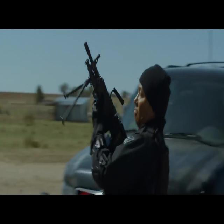

In [35]:
# Load a image from the validation dataset
img = load_img(
    path="./test_gun.jpg", 
    target_size=(224, 224)
)

img

In [38]:
# Convert validation image into a NumPy array
x = img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [41]:
# Expand dimensions of image array to accommodate for batch size
x = np.expand_dims(
    a=x,
    axis=0,
)
x

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [45]:
# Preprocess the image array as required by VGG16 from Keras Applications
img_data = preprocess_input(x)

img_data

array([[[[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ]],

        ...,

        [[-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         [-103.939, -116.779, -123.68 ],
         ...,
         [-103.939, -116.779, -123.68 ],
         [-103.939, -1

In [46]:
# Return prediction
prediction = model.predict(img_data)

print(prediction)

1/1 [==============================] - 0s 220ms/step
[[1.]]


In [48]:
# Display the prediction
if prediction > 0.5:
    print("Gun Detected!")
else:
    print("No Gun Detected.")

Gun Detected!
